In [1]:
import numpy as np
import cmath
from numpy import linalg as npla
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def eigen(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return (eigenValues, eigenVectors)

In [3]:
L=15.0  # box length is 2L; [-L,L]
m=1     # particle mass 
k=1
hbar=1  # 1 in atomic units

In [4]:
def potential(x): 
    potential = k*x**2 / 2   # harmonic potential
    return potential
    
def fn_V(x):
    psi_i=np.sqrt(1/L)*np.sin((i+1)*(x-L)*np.pi/(2*L))
    psi_j=np.sqrt(1/L)*np.sin((j+1)*(x-L)*np.pi/(2*L))
    Nx=x.size
    pot=np.zeros(Nx)
    for ix in range(Nx):
        pot[ix]=potential(x[ix])
    
    fn_V=psi_i * pot * psi_j
    return fn_V

for iN in range(0,6):
    
    N=2**iN    # No. of basis functions

    V=np.zeros([N,N])
    T=np.zeros([N,N])
    H=np.zeros([N,N])
    
    for i in range(N):
        for j in range(N):
            Int_V=integrate.quadrature(fn_V, -L, L,maxiter=1000)
            V[i][j]=Int_V[0] 
        T[i][i]=(i+1)**2 * hbar**2 * np.pi**2 / (8 * m * L**2)

    H=T+V

    E,V=eigen(H)

    print("Number of basis: ", N, ", ground state energy is:", E[0])

Number of basis:  1 , ground state energy is: 14.708216794050095
Number of basis:  2 , ground state energy is: 14.708216794050095
Number of basis:  4 , ground state energy is: 4.976477884410372
Number of basis:  8 , ground state energy is: 1.5203914108966554
Number of basis:  16 , ground state energy is: 0.5860462956415858
Number of basis:  32 , ground state energy is: 0.5000285273288201


In [5]:
def psi(x):
    k=iwfn
    psi=0
    for i in range(N):
        psi=psi+V[i][k]*np.sqrt(1/L)*np.sin((i+1)*(x-L)*np.pi/(2*L))
    return psi

def W(x,p):  # Wiger distribution function
    Ny=101
    y=np.linspace(-L, L, Ny)
    dy=y[1]-y[0]
    W=0
    for iy in range(Ny):
        W=W+psi(x+hbar*y[iy]/2)*psi(x-hbar*y[iy]/2)*cmath.exp(1j*p*y[iy])*dy/(4*np.pi**2)
    rW=np.real(W)
    return rW

In [6]:
Nx=51
x=np.linspace(-3, 3, Nx)
p=np.linspace(-3, 3, Nx)
X, Y = np.meshgrid(x, p)

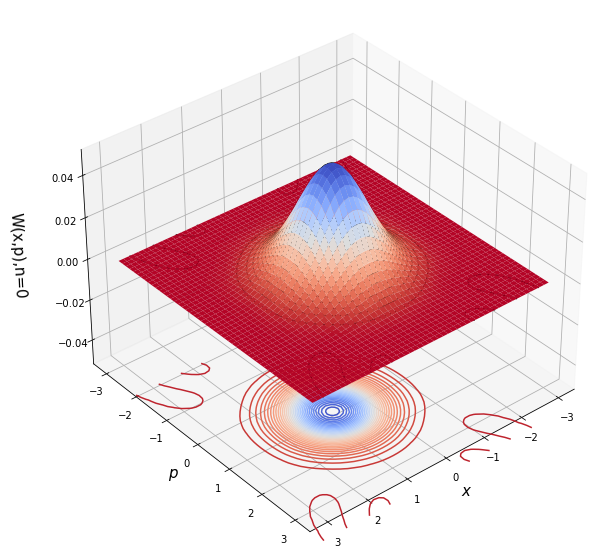

In [7]:
Z=np.zeros([Nx,Nx])
iwfn=0
for ix in range(Nx):
    for ip in range(Nx):
        Z[ix][ip]=W(x[ix],p[ip])
        
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")


ax.plot_surface(X, Y, Z, cmap="coolwarm_r", lw=1, rstride=1, cstride=1)
ax.contour(X, Y, Z, 40, colors="k", linestyles="solid")
ax.contour(X, Y, Z, 40, cmap="coolwarm_r", linestyles="solid", offset=-0.07)


ax.set_xlabel('$x$',fontsize=15)
ax.set_ylabel('$p$',fontsize=15)
ax.set_zlabel('W(x,p),n=0',fontsize=15,labelpad=20)
        
ax.set_zlim3d(-0.05,0.05)

ax.view_init(35, 50)
plt.savefig('Wxp_0.png') 

plt.show()

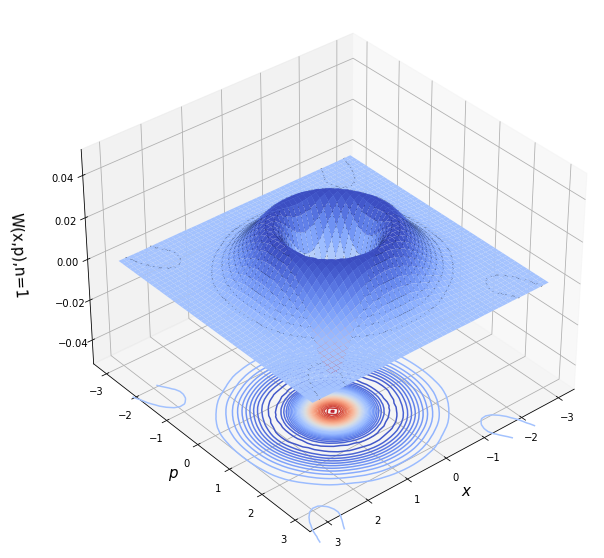

In [8]:
Z=np.zeros([Nx,Nx])
iwfn=1
for ix in range(Nx):
    for ip in range(Nx):
        Z[ix][ip]=W(x[ix],p[ip])
        
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")


ax.plot_surface(X, Y, Z, cmap="coolwarm_r", lw=1, rstride=1, cstride=1)
ax.contour(X, Y, Z, 40, colors="k", linestyles="solid")
ax.contour(X, Y, Z, 40, cmap="coolwarm_r", linestyles="solid", offset=-0.07)


ax.set_xlabel('$x$',fontsize=15)
ax.set_ylabel('$p$',fontsize=15)
ax.set_zlabel('W(x,p),n=1',fontsize=15,labelpad=20)
        
ax.set_zlim3d(-0.05,0.05)

ax.view_init(35, 50)
plt.savefig('Wxp_1.png') 

plt.show()

In [ ]:
Z=np.zeros([Nx,Nx])
iwfn=2
for ix in range(Nx):
    for ip in range(Nx):
        Z[ix][ip]=W(x[ix],p[ip])
        
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")


ax.plot_surface(X, Y, Z, cmap="coolwarm_r", lw=1, rstride=1, cstride=1)
ax.contour(X, Y, Z, 40, colors="k", linestyles="solid")
ax.contour(X, Y, Z, 40, cmap="coolwarm_r", linestyles="solid", offset=-0.07)


ax.set_xlabel('$x$',fontsize=15)
ax.set_ylabel('$p$',fontsize=15)
ax.set_zlabel('W(x,p),n=2',fontsize=15,labelpad=20)
        
ax.set_zlim3d(-0.05,0.05)

ax.view_init(35, 50)
plt.savefig('Wxp_2.png') 

plt.show()

In [ ]:
Z=np.zeros([Nx,Nx])
iwfn=3
for ix in range(Nx):
    for ip in range(Nx):
        Z[ix][ip]=W(x[ix],p[ip])
        
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")


ax.plot_surface(X, Y, Z, cmap="coolwarm_r", lw=1, rstride=1, cstride=1)
ax.contour(X, Y, Z, 40, colors="k", linestyles="solid")
ax.contour(X, Y, Z, 40, cmap="coolwarm_r", linestyles="solid", offset=-0.07)


ax.set_xlabel('$x$',fontsize=15)
ax.set_ylabel('$p$',fontsize=15)
ax.set_zlabel('W(x,p),n=3',fontsize=15,labelpad=20)
        
ax.set_zlim3d(-0.05,0.05)

ax.view_init(35, 50)
plt.savefig('Wxp_3.png') 

plt.show()